<a href="https://colab.research.google.com/github/HenriqueCCdA/ElementosFinitosCurso/blob/main/notebooks/Elemento_finitos_Exercicios_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.linalg import lu_factor, lu_solve
import matplotlib.pyplot as plt
import matplotlib as mpl

# Paramentros de entrada

In [ ]:
f      =  -2
dudx_0 =  -2
u3     =  0.0

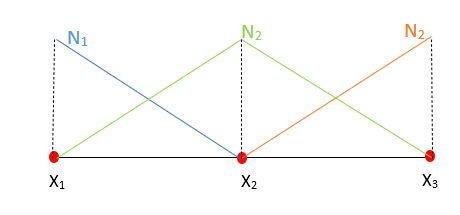

## No 1

\begin{equation}
k_{11} = \int_0^1 \frac{dN_1}{dx} \frac{dN_1}{dx} dx =  \int_0^{1/2} \frac{dN_1}{dx} \frac{dN_1}{dx} dx =  \int_0^{1/2} (-2) (-2) dx = (-2) (=2) \left(\frac{1}{2} - 0 \right) = 2 
\end{equation}

\begin{equation}
k_{12} = \int_0^1 \frac{dN_1}{dx} \frac{dN_2}{dx} dx =  \int_0^{1/2} \frac{dN_1}{dx} \frac{dN_2}{dx} dx =  \int_0^{1/2} (-2) (2) dx = (-2) (2) \left(\frac{1}{2} - 0 \right) = -2 
\end{equation}

\begin{equation}
k_{13} = \int_0^1 \frac{dN_1}{dx} \frac{dN_3}{dx} dx = 0
\end{equation}

\begin{equation}
f_{1} = \int_0^1 f N_1dx + \frac{du}{dx}(1) N_1(1) - \frac{du}{dx}(0) N_1(0) =  \frac{f}{4} - \frac{du}{dx}(0)
\end{equation}


In [ ]:
k11 =  2.0
k12 = -2.0
k13 =  0.0
f1 = f/4 - dudx_0

## No 2

\begin{equation}
k_{21} = \int_0^1 \frac{dN_2}{dx} \frac{dN_1}{dx} dx = 2 
\end{equation}

\begin{equation}
k_{22} = \int_0^1 \frac{dN_2}{dx} \frac{dN_2}{dx} dx =  \int_0^{1/2} \frac{dN_2}{dx} \frac{dN_2}{dx} dx +  \int_{1/2}^{1} \frac{dN_2}{dx} \frac{dN_2}{dx} dx =  \int_0^{1/2} (2) (2) dx + \int_{1/2}^{1} (-2) (-2) dx = 2 + 2 = 4 
\end{equation}

\begin{equation}
k_{23} = \int_0^1 \frac{dN_2}{dx} \frac{dN_3}{dx} dx = \int_{1/2}^1 \frac{dN_2}{dx} \frac{dN_3}{dx} dx = \int_{1/2}^1 (2) (-2) dx = -2
\end{equation}

\begin{equation}
f_{2} = \int_0^1 f N_2dx + \frac{du}{dx}(1) N_2(1) - \frac{du}{dx}(0) N_2(0) =  \frac{f}{2}
\end{equation}


In [ ]:
k21 = k12
k22 = 4.0
k23 = -2.0
f2 = f/2

# Sistema de equações

\begin{equation}
\begin{bmatrix}
 k_{11} & k_{12}\\ 
 k_{21} & k_{22}
\end{bmatrix}
*
\begin{bmatrix}
u_1\\
u_2
\end{bmatrix}
= 
\begin{bmatrix}
f_1 - k_{13} * u_3\\
f_2 - k_{23} * u_3
\end{bmatrix}
\end{equation}



## Matriz de Coeficiente Real

In [ ]:
K = np.array([
             [k11, k12],
             [k21, k22],            
            ])

K

array([[ 2., -2.],
       [-2.,  4.]])

## Vetor de forças

In [ ]:
F = np.array([
              f1 - k13 * u3,
              f2 - k23 * u3
            ])

F

array([ 1.5, -1. ])

In [ ]:
lu, piv = lu_factor(K)
u1, u2 = lu_solve((lu, piv), F)

In [ ]:
u_numerico_coef = [ u1, u2, u3]   
u_numerico_coef

[1.0, 0.25, 0.0]

In [ ]:
x_malha = [0, 0.5, 1.0]
x_malha

[0, 0.5, 1.0]

# Solução Exata

Solução
$$
u(x) = x ^ 2 - 2 x + 1
$$

Derivada da solução

$$
\frac{du}{dx} = 2 x - 2 
$$

In [ ]:
def u_analitico(x):
  return x**2 - 2.0 * x + 1.0

def dudx_analitico(x):
  return 2.0 * x - 2.0  

# Solução númerica 

Aproximação

$$u(x) = N_1(x) u_1 + N_2(x) u_2 + N_3(x) u_3$$

**Funções de interpolação:**

* $N_1$:

$$
N_1(x) = \begin{cases}
                      &1 * -2 x     &\text{ se } & 0 < x < 1/2 \\ 
                      &0            &\text{ se } & 1/2 < x < 1 
          \end{cases}                    
$$

* $N_2$:

$$
N_2(x) = \begin{cases}
                      &2 x     &\text{ se } & 0 < x < 1/2 \\ 
                      &2 - 2 x &\text{ se } & 1/2 < x < 1 
          \end{cases}
$$

* $N_3$:

$$
N_3(x) = \begin{cases}
                      &0             &\text{ se } & 0 < x < 1/2 \\ 
                      &2 x - 1     &\text{ se } & 1/2 < x < 1 
          \end{cases}                    
$$



In [ ]:
def u_numerico(x, u_numerico_coef, x_malha):

  u1, u2, u3 = u_numerico_coef

  x1, x2, x3 = x_malha
  
  # 0 < x < 1/2
  if x1 <= x < x2:
    N1 = 1.0 - 2.0 * x
    N2 = 2.0 * x
    N3 = 0.0

    # 1/2 < x < 1
  elif x2 <= x <= x3:
    N1 = 0.0
    N2 = 2.0 * ( 1.0 - x)
    N3 = 2*x - 1.0


  return N1*u1 + N2 * u2 + N3 *u3



**Solução númerica:** 

$$
\frac{du}{dx}(x) = \frac{dN_1}{dx}(x) u_1 + \frac{dN_2}{dx}(x) u_2 + \frac{dN_3}{dx}(x) u_3
$$

**Funções de interpolação:**

* $\frac{dN_1}{dx}$:

$$
\frac{dN_1}{dx} = \begin{cases}
                      &-2     &\text{ se } & 0 < x < 1/2 \\ 
                      &0      &\text{ se } & 1/2 < x < 1 
          \end{cases}                    
$$

* $N_2$:

$$
\frac{dN_2}{dx} = \begin{cases}
                      & 2        &\text{ se } & 0 < x < 1/2 \\ 
                      &-2        &\text{ se } & 1/2 < x < 1 
          \end{cases}
$$

* $N_3$:

$$
\frac{dN_3}{dx} = \begin{cases}
                      &0             &\text{ se } & 0 < x < 1/2 \\ 
                      &2             &\text{ se } & 1/2 < x < 1 
          \end{cases}                    
$$


In [ ]:
def dudx_numerico(x, u_numerico_coef, x_malha):

  u1, u2, u3 = u_numerico_coef

  x1, x2, x3 = x_malha
  
  # 0 < x < 1/2
  if x1 <= x < x2:
    dN1dx = -2.0
    dN2dx =  2.0
    dN3dx =  0.0

    # 1/2 < x < 1
  elif x2 <= x <= x3:
    dN1dx =  0.0
    dN2dx = -2.0
    dN3dx =  2.0


  return dN1dx * u1 + dN2dx * u2 + dN3dx *u3

# Plotando os resultados

In [ ]:
x = np.linspace(0, 1, 50)

In [ ]:
u_exato = [ u_analitico(xi) for xi in x  ]
dudx_exato = [ dudx_analitico(xi) for xi in x  ]

In [ ]:
u_num = [ u_numerico(xi, u_numerico_coef, x_malha) for xi in x  ]
dudx_num = [ dudx_numerico(xi, u_numerico_coef, x_malha) for xi in x  ]

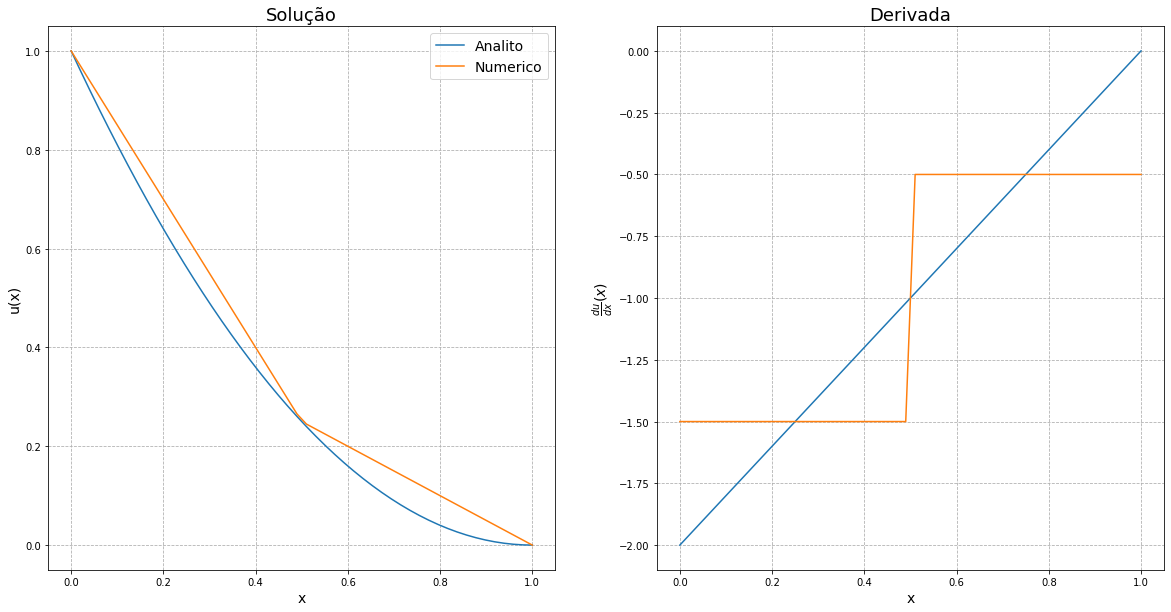

In [ ]:
mpl.rcParams['figure.figsize'] = (20, 10)
#
fig, (ax1, ax2) = plt.subplots(ncols = 2)
#
ax1.set_title('Solução', fontsize = 18)
ax1.plot(x, u_exato, label = 'Analito')
ax1.plot(x, u_num  , label = 'Numerico')
ax1.set_ylabel('u(x)', fontsize = 14)
ax1.set_xlabel('x', fontsize = 14)
#
ax2.set_title('Derivada', fontsize = 18)
ax2.plot(x, dudx_exato)
ax2.plot(x, dudx_num)
ax2.set_ylabel(r'$\frac{du}{dx}(x)$', fontsize = 14)
ax2.set_xlabel('x', fontsize = 14)
#
ax1.grid(ls = '--')
ax2.grid(ls = '--')
#
ax1.legend(fontsize=14)
plt.show()